In [ ]:
import os
import numpy as np
import tensorflow as tf
import shutil
import glob as glob
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/mu2mech_final_data_10.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_90.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_100.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_110.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_120.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_130.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_140.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_150.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_160.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_170.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_180.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_190.00.png  
  inflating: /content/mu2mech_final_data/10time_step/0.43%/output_200.00.png  
  

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/New_models_Mu2Mech/1th_time_step/Reconstruction_model_4/autoencoder.hdf5')

In [ ]:

layer_name = 'max_pooling2d_2'
encoder = tf.keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
layer_name = 'conv2d_6'
decoder = tf.keras.Model(inputs=encoder.output,outputs=model.get_layer(layer_name).output)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         580       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 4)        0

In [ ]:
# Input for ConvLSTM

compositions = ['0.25%', '0.3%', '0.33%', '0.35%','0.37%', '0.4%', '0.43%', '0.45%', '0.47%', '0.5%']
train_images = []
from tkinter import Tcl
from PIL import Image

for i in range(0,10):
 comp = compositions[i]
 X = glob.glob("/content/mu2mech_final_data/1time_step/"+comp+"/*.png")
 X_sorted = Tcl().call('lsort', '-dict', X)
 print(len(X_sorted))
#  train_images = []

 for i,path in enumerate(X_sorted[1:]):
  image = cv2.imread(X_sorted[i], cv2.IMREAD_GRAYSCALE)
  img = np.array(image)
  # img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
  img = img.astype("float32") / 255
  train_images.append(img)

print(len(train_images))
# 1k images

# Converting to a numpy array
train_images = np.array(train_images)
print(train_images.shape)

X_train = train_images
print(X_train.shape)




1001
1001
1001
1001
1001
1001
1001
1001
1001
1001
10000
(10000, 128, 128)
(10000, 128, 128)


(-0.5, 127.5, 127.5, -0.5)

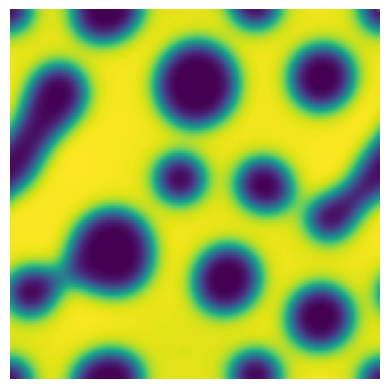

In [ ]:
plt.imshow(X_train[2241])
plt.axis('off')

In [ ]:
# Input for ConvLSTM

compositions = ['0.25%', '0.3%', '0.33%', '0.35%','0.37%', '0.4%', '0.43%', '0.45%', '0.47%', '0.5%']
train_images = []
from tkinter import Tcl
from PIL import Image

for i in range(0,10):
 comp = compositions[i]
 X = glob.glob("/content/mu2mech_final_data/1time_step/"+comp+"/*.png")
 X_sorted = Tcl().call('lsort', '-dict', X)
 print(len(X_sorted))
#  train_images = []

 for i,path in enumerate(X_sorted[1:]):
  image = cv2.imread(X_sorted[i])
  img = np.array(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype("float32") / 255
  train_images.append(img)

print(len(train_images))
# 1k images

# Converting to a numpy array
train_images = np.array(train_images)
print(train_images.shape)

X_train = train_images
print(X_train.shape)




1001
1001
1001
1001
1001
1001
1001
1001
1001
1001
10000
(10000, 128, 128, 3)
(10000, 128, 128, 3)


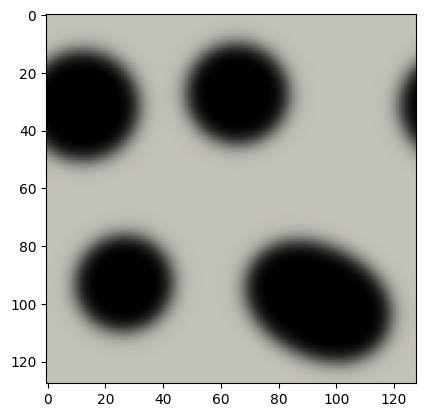

In [ ]:
plt.imshow(X_train[1997])

In [ ]:

X_train.shape
encoded_images = encoder.predict(X_train)

print(encoded_images.shape)

convlstm_input = []

for i in range(0,9960):
  temp = encoded_images[i:i+40,...]
  convlstm_input.append(temp)

convlstm_input = np.array(convlstm_input)

# Input is a 5D array - (samples, time_steps, H,W,filters)
convlstm_input.shape

# Inputs for the ConvLSTM model
X = convlstm_input

# Y will be the current 40 frames + 1st image
Y = encoded_images[40:,...]

print(X.shape)
print(Y.shape)


313/313 [==============================] - 10s 5ms/step
(10000, 16, 16, 4)
(9960, 40, 16, 16, 4)
(9960, 16, 16, 4)


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Construct the input layer with no definite frame size.
inp = tf.keras.layers.Input(shape=(None, 16,16,4))



x = tf.keras.layers.ConvLSTM2D(
    filters=16,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="tanh",
)(inp)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ConvLSTM2D(
    filters=8,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=False,
    activation="tanh",
)(x)

x = tf.keras.layers.Conv2D(
     filters=4, kernel_size=(3, 3), activation="relu", padding="same"
)(x)

# Next, we will build the complete model and compile it.
lstm_model = tf.keras.models.Model(inp, x)


In [ ]:

lstm_model.compile(
    loss='mse', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy']
)


In [ ]:
lstm_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 16, 16, 4)  0         
                             ]                                   
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 16, 16, 16)  32064     
                                                                 
 batch_normalization (BatchN  (None, None, 16, 16, 16)  64       
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 16, 16, 8)         800       
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 4)         292       
                                                                 
Total params: 33,220
Trainable params: 33,188
Non-trainable

In [ ]:

# Define some callbacks to improve training.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 50
batch_size = 8

checkpoint_filepath = '/content/drive/MyDrive/New_models_Mu2Mech/1th_time_step/LSTM_Model_2/lstm_model_1.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Splitting into train and validation
size = int(0.8*len(X))

#Training set
X_train = X[:size,...]
# Y = np.expand_dims(Y, axis=1)
y_train = Y[:size,...]

# X_val will be the images
X_val = X[size:,...]
# Y will be current training image + 1
y_val = Y[size:,...]

print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)

(1992, 40, 16, 16, 4)
(1992, 16, 16, 4)
(7968, 40, 16, 16, 4)
(7968, 16, 16, 4)


In [ ]:

# Fit the model to the training data.
lstm_model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=epochs,
    validation_data = (X_val,y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint_callback],
)


Epoch 1/50
996/996 [==============================] - 208s 197ms/step - loss: 0.0033 - accuracy: 0.9281 - val_loss: 0.0023 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 2/50
996/996 [==============================] - 205s 205ms/step - loss: 6.0377e-04 - accuracy: 0.9653 - val_loss: 0.0015 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 3/50
996/996 [==============================] - 194s 194ms/step - loss: 4.2468e-04 - accuracy: 0.9722 - val_loss: 4.8612e-04 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 4/50
996/996 [==============================] - 202s 202ms/step - loss: 3.1497e-04 - accuracy: 0.9771 - val_loss: 3.1264e-04 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 5/50
996/996 [==============================] - 192s 192ms/step - loss: 2.4700e-04 - accuracy: 0.9805 - val_loss: 3.9980e-04 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 6/50
996/996 [==============================] - 204s 205ms/step - loss: 2.1542e-04 - accuracy: 0.9826 - val_loss: 2.3713e-04 - val_accuracy: 0.9785 - lr: 0.0010
Epoch 7/50

# Testing


In [ ]:
X = glob.glob("/content/mu2mech_final_data/5time_step/0.47%"+"/*.png")
test_images_list = []
from tkinter import Tcl
X_sorted = Tcl().call('lsort', '-dict', X)

print(len(X_sorted))

from PIL import Image
test_images = []

for i,path in enumerate(X_sorted[:1000]):
  image = cv2.imread(X_sorted[i])
  img = np.array(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype("float32") / 255
  test_images.append(img)

print(len(test_images))
# 1k images

# Converting to a numpy array
test_images = np.array(test_images)
print(test_images.shape)

X_test = test_images
print(X_test.shape)

encoded_images = encoder.predict(X_test)
# Y will be the current 40 frames + 1st image
Y_test = encoded_images[40:,...]
print(Y_test.shape)


1001
1000
(1000, 128, 128, 3)
(1000, 128, 128, 3)
32/32 [==============================] - 0s 5ms/step
(960, 16, 16, 4)


In [ ]:
def encoder_input(X_test):

  # 1. Encode the images .
  encoded_images = encoder.predict(X_test)

  # Shape - (None, 32,32,8)

  # 2. Generate the predictions

  convlstm_input = []

  for i in range(0,960):
    temp = encoded_images[i:i+40,...]
    convlstm_input.append(temp)

  convlstm_input = np.array(convlstm_input)
  return convlstm_input

In [ ]:

def predict_frames(convlstm_input, idx, frames):
  predictions = []
  current_batch = convlstm_input[idx]
  current_batch = current_batch.reshape(1,40, 16, 16, 4)
  for i in range(frames):
     preds = lstm_model.predict(current_batch)[0]
     current_pred = preds
     predictions.append(current_pred)
     current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
  predictions = np.array(predictions)
  return predictions

In [ ]:
inputs = encoder_input(X_test)
preds = predict_frames(inputs, 1, 5)
outputs = decoder.predict(preds)

1/1 [==============================] - 0s 21ms/step


In [ ]:
outputs.shape

(5, 128, 128, 3)

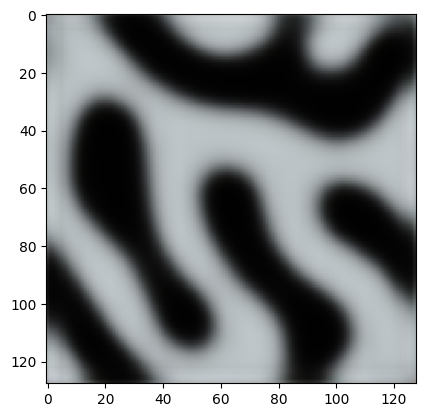

In [ ]:
plt.imshow(outputs[0])